In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('training_data.csv')
df.head()

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6,54) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,PolicyNo,Policy_Company,Policy_Installment_Term,Policy_Billing_Code,Policy_Method_Of_Payment,Policy_Reinstatement_Fee_Indicator,Policy_Zip_Code_Garaging_Location,Vehicle_Territory,Vehicle_Make_Year,Vehicle_Make_Description,...,EEA_Prior_Bodily_Injury_Limit,EEA_PolicyYear,SYS_Renewed,SYS_New_Business,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
0,164532941,Standard,6,Direct Billed to Insured,Pre-paid,N,43046,35,2004,BUIK LESABRE LI,...,100-400,2006,Y,N,320.12,0,0.0,0.0,0.0,0.0
1,164533241,Standard,6,Direct Billed to Insured,Pre-paid,N,Unknown,35,1980,CADILLAC 4-DOOR,...,100-200,2006,Y,N,259.70,0,0.0,0.0,0.0,0.0
2,164534633,Standard,6,Direct Billed to Insured,Pre-paid,N,43555,17,2005,PONT MONTANA SV,...,100-400,2006,Y,N,613.74,0,0.0,0.0,0.0,0.0
3,164534839,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MERC GRAND MARQ,...,40-100,2006,Y,N,541.66,0,0.0,0.0,0.0,0.0
4,164534840,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MERC GRAND MARQ,...,40-100,2006,Y,N,541.66,0,0.0,0.0,0.0,0.0


In [3]:
df.shape

(424431, 69)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424431 entries, 0 to 424430
Data columns (total 69 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   PolicyNo                                  424431 non-null  int64  
 1   Policy_Company                            424431 non-null  object 
 2   Policy_Installment_Term                   424431 non-null  int64  
 3   Policy_Billing_Code                       424431 non-null  object 
 4   Policy_Method_Of_Payment                  424431 non-null  object 
 5   Policy_Reinstatement_Fee_Indicator        424431 non-null  object 
 6   Policy_Zip_Code_Garaging_Location         424431 non-null  object 
 7   Vehicle_Territory                         424431 non-null  int64  
 8   Vehicle_Make_Year                         424431 non-null  int64  
 9   Vehicle_Make_Description                  424431 non-null  object 
 10  Vehicle_Performance 

In [5]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df

,Policy_Company,Policy_Billing_Code,Policy_Method_Of_Payment,Policy_Reinstatement_Fee_Indicator,Policy_Zip_Code_Garaging_Location,Vehicle_Make_Description,Vehicle_Performance,Vehicle_Usage,Vehicle_Annual_Miles,Vehicle_Anti_Theft_Device,...,Vehicle_Safe_Driver_Discount_Indicator,EEA_Liability_Coverage_Only_Indicator,EEA_Multi_Auto_Policies_Indicator,EEA_Policy_Zip_Code_3,EEA_Agency_Type,EEA_Packaged_Policy_Indicator,EEA_Full_Coverage_Indicator,EEA_Prior_Bodily_Injury_Limit,SYS_Renewed,SYS_New_Business
0,Standard,Direct Billed to Insured,Pre-paid,N,43046,BUIK LESABRE LI,Standard,Farm,Unknown,Not Applicable,...,Y,N,N,430,Standard,N,Y,100-400,Y,N
1,Standard,Direct Billed to Insured,Pre-paid,N,Unknown,CADILLAC 4-DOOR,Standard,Farm,Unknown,Not Applicable,...,Y,N,N,Unknown,Preferred,N,Y,100-200,Y,N
2,Standard,Direct Billed to Insured,Pre-paid,N,43555,PONT MONTANA SV,Standard,Pleasure,Unknown,Passive Disabling-Vehicle Recovery,...,Y,N,N,435,Non-standard,N,Y,100-400,Y,N
3,Standard,Direct Billed to Insured,Pre-paid,N,43561,MERC GRAND MARQ,Standard,Pleasure,Unknown,Passive Disabling-Vehicle Recovery,...,Y,N,Y,435,Non-standard,Y,Y,40-100,Y,N
4,Standard,Direct Billed to Insured,Pre-paid,N,43561,MERC GRAND MARQ,Standard,Pleasure,Unknown,Passive Disabling-Vehicle Recovery,...,Y,N,Y,435,Non-standard,Y,Y,40-100,Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424426,Standard,Direct Billed to Insured,Pre-paid,N,42851,PONT GR PRIX GT,Standard,Pleasure,Unknown,Passive Disabling-Vehicle Recovery,...,N,N,N,428,Preferred,N,Y,NaN,Y,Y
424427,Standard,Direct Billed to Insured,Pre-paid,N,43669,NSSN QUEST,Standard,Pleasure,Unknown,Active Disabling,...,N,N,Y,436,Hybrid,Y,N,100-200,Y,Y
424428,Standard,Direct Billed to Insured,Installment,N,42487,PONT TRANSSPORT,Standard,Pleasure,Unknown,Passive Disabling-Vehicle Recovery,...,N,N,Y,424,Preferred,N,Y,100-400,N,Y
424429,Preferred,Direct Billed to Insured,Installment,N,43360,PONT SUNFIRE SE,Standard,Pleasure,Unknown,Not Applicable,...,N,Y,Y,433,Non-standard,N,N,40-100,N,Y


In [6]:
# Display a statistical overview of the DataFrame
df.describe()

,PolicyNo,Policy_Installment_Term,Vehicle_Territory,Vehicle_Make_Year,Vehicle_New_Cost_Amount,Vehicle_Symbol,Vehicle_Number_Of_Drivers_Assigned,Vehicle_Miles_To_Work,Vehicle_Days_Per_Week_Driven,Vehicle_Age_In_Years,...,Driver_Total_Upper_Senior_Ages_70_plus,Vehicle_Driver_Points,EEA_Policy_Tenure,EEA_PolicyYear,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
count,4.244310e+05,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,...,424431.000000,424431.000000,424431.000000,424431.0,424431.000000,424431.000000,4.244310e+05,424431.000000,4.244310e+05,424431.000000
mean,3.144874e+08,6.224701,31.051629,1996.753482,290.333958,11.192347,28.397318,3.302400,4.998798,7.037130,...,0.096454,0.119765,5.886341,2006.0,335.354228,0.046893,2.354292e+02,0.115018,2.267193e+02,1.154623
std,5.776142e+07,1.139174,4.186688,7.388605,2876.619060,4.007123,43.952581,7.698294,0.080719,2.576152,...,0.314316,0.383814,6.646432,0.0,206.291385,0.223597,3.399225e+03,1.636176,3.337804e+03,55.153868
min,1.645329e+08,6.000000,13.000000,1924.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,...,0.000000,0.000000,-1.000000,2006.0,0.540000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,2.832442e+08,6.000000,30.000000,1993.000000,-1.000000,8.000000,1.000000,-1.000000,5.000000,5.000000,...,0.000000,0.000000,1.200000,2006.0,157.940000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
50%,3.326177e+08,6.000000,31.000000,1998.000000,-1.000000,11.000000,1.000000,-1.000000,5.000000,9.000000,...,0.000000,0.000000,3.500000,2006.0,328.580000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
75%,3.612798e+08,6.000000,35.000000,2002.000000,-1.000000,14.000000,99.000000,6.000000,5.000000,9.000000,...,0.000000,0.000000,8.300000,2006.0,445.200000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
max,3.823488e+08,12.000000,37.000000,2008.000000,99999.000000,27.000000,99.000000,99.000000,9.000000,9.000000,...,2.000000,7.000000,54.000000,2006.0,3941.080000,5.000000,1.072292e+06,370.370370,1.072292e+06,24787.140000


In [7]:
# check the data if there is any missing data points per column
missing_values_count = df.isnull().sum()

In [8]:
# look at the # of missing points in the columns
missing_values_count[0:60]
#missing_values_count[0:69]

PolicyNo                                        0
Policy_Company                                  0
Policy_Installment_Term                         0
Policy_Billing_Code                             0
Policy_Method_Of_Payment                        0
Policy_Reinstatement_Fee_Indicator              0
Policy_Zip_Code_Garaging_Location               0
Vehicle_Territory                               0
Vehicle_Make_Year                               0
Vehicle_Make_Description                        0
Vehicle_Performance                             0
Vehicle_New_Cost_Amount                         0
Vehicle_Symbol                                  0
Vehicle_Number_Of_Drivers_Assigned              0
Vehicle_Usage                                   0
Vehicle_Miles_To_Work                           0
Vehicle_Days_Per_Week_Driven                    0
Vehicle_Annual_Miles                            0
Vehicle_Anti_Theft_Device                       0
Vehicle_Passive_Restraint                       0


In [9]:
# create a pandas-profiling report for better understanding of the dataset
#profile_elect = ProfileReport(df, title='Portfolio Report')
#profile_elect.to_file("portfolio_report.html")

In [10]:
df.corr()

,PolicyNo,Policy_Installment_Term,Vehicle_Territory,Vehicle_Make_Year,Vehicle_New_Cost_Amount,Vehicle_Symbol,Vehicle_Number_Of_Drivers_Assigned,Vehicle_Miles_To_Work,Vehicle_Days_Per_Week_Driven,Vehicle_Age_In_Years,...,Driver_Total_Upper_Senior_Ages_70_plus,Vehicle_Driver_Points,EEA_Policy_Tenure,EEA_PolicyYear,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
PolicyNo,1.000000,0.074224,-0.020730,0.027827,0.015798,0.079465,0.126597,0.011696,0.007795,-0.030603,...,-0.218888,0.072866,-0.879130,NaN,0.034532,0.027508,0.014785,0.011559,0.014270,0.003051
Policy_Installment_Term,0.074224,1.000000,0.001015,0.026642,0.005615,0.023674,-0.000886,0.006645,0.001091,-0.030859,...,0.009865,0.017890,-0.061027,NaN,0.325114,0.045434,0.015728,0.003594,0.014125,0.000054
Vehicle_Territory,-0.020730,0.001015,1.000000,-0.009061,-0.007689,-0.005891,0.002479,-0.018704,0.003195,-0.006025,...,0.006235,-0.010607,0.021064,NaN,-0.034599,-0.013097,-0.005857,-0.005910,-0.005771,-0.003306
Vehicle_Make_Year,0.027827,0.026642,-0.009061,1.000000,0.035136,0.498726,0.003662,0.075274,0.000372,-0.704518,...,-0.079790,0.059103,-0.045147,NaN,0.541244,0.075605,0.027465,0.020062,0.026553,0.002206
Vehicle_New_Cost_Amount,0.015798,0.005615,-0.007689,0.035136,1.000000,0.061648,0.003942,-0.000727,-0.000258,-0.041822,...,-0.011410,0.001182,-0.017089,NaN,0.049957,0.004213,0.000749,0.001361,0.000732,-0.000493
Vehicle_Symbol,0.079465,0.023674,-0.005891,0.498726,0.061648,1.000000,0.047245,0.026139,0.001297,-0.416821,...,-0.125559,0.049263,-0.087711,NaN,0.453452,0.051319,0.021756,0.014877,0.020999,0.001186
Vehicle_Number_Of_Drivers_Assigned,0.126597,-0.000886,0.002479,0.003662,0.003942,0.047245,1.000000,0.134837,0.000014,-0.015179,...,-0.187266,0.031278,-0.135735,NaN,-0.017216,-0.006816,-0.003428,-0.003227,-0.003409,-0.002467
Vehicle_Miles_To_Work,0.011696,0.006645,-0.018704,0.075274,-0.000727,0.026139,0.134837,1.000000,-0.000579,-0.034013,...,-0.147663,0.039102,-0.024156,NaN,0.121913,0.014275,0.003734,0.005965,0.003602,-0.001067
Vehicle_Days_Per_Week_Driven,0.007795,0.001091,0.003195,0.000372,-0.000258,0.001297,0.000014,-0.000579,1.000000,-0.000715,...,0.001225,-0.000983,-0.005339,NaN,-0.000522,-0.003405,-0.001793,-0.000742,-0.001865,0.000005
Vehicle_Age_In_Years,-0.030603,-0.030859,-0.006025,-0.704518,-0.041822,-0.416821,-0.015179,-0.034013,-0.000715,1.000000,...,0.066002,-0.041415,0.031906,NaN,-0.547855,-0.062753,-0.028379,-0.012532,-0.027334,-0.001998


In [11]:
df.corr()['Loss_Amount']

PolicyNo                                    0.014785
Policy_Installment_Term                     0.015728
Vehicle_Territory                          -0.005857
Vehicle_Make_Year                           0.027465
Vehicle_New_Cost_Amount                     0.000749
Vehicle_Symbol                              0.021756
Vehicle_Number_Of_Drivers_Assigned         -0.003428
Vehicle_Miles_To_Work                       0.003734
Vehicle_Days_Per_Week_Driven               -0.001793
Vehicle_Age_In_Years                       -0.028379
Vehicle_Med_Pay_Limit                       0.006681
Vehicle_Physical_Damage_Limit               0.006070
Vehicle_Comprehensive_Coverage_Limit        0.003187
Vehicle_Collision_Coverage_Deductible       0.020509
Driver_Total                                0.004486
Driver_Total_Male                          -0.006112
Driver_Total_Female                         0.008930
Driver_Total_Single                         0.014020
Driver_Total_Married                       -0.

<AxesSubplot:>

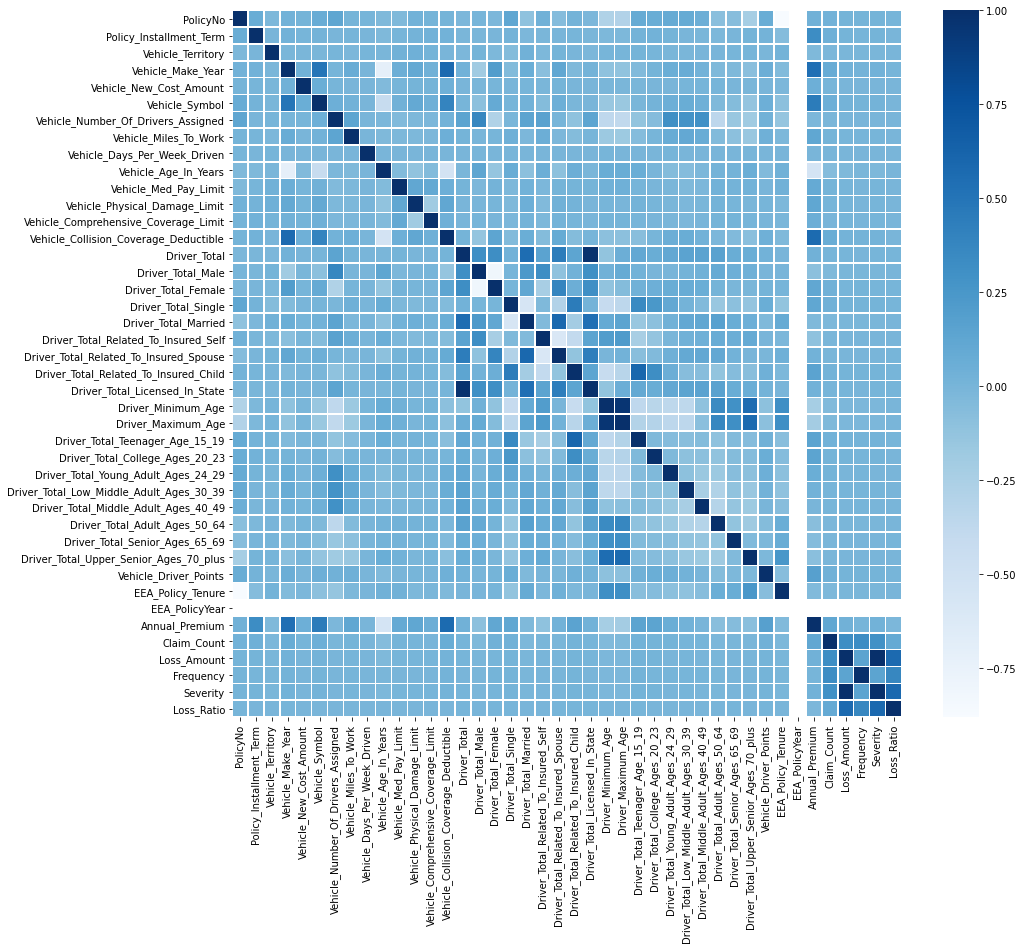

In [12]:
f, ax = plt.subplots(figsize =(15, 13)) 
sns.heatmap(df.corr(), ax = ax, cmap ='Blues', linewidths = 0.5)

In [13]:
from plotly.offline  import download_plotlyjs,init_notebook_mode,plot, iplot
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
temp = df.Claim_Count.value_counts()
#temp = df.Claim_Count.apply(lambda i:1 if i>0 else 0).value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, 1]},
      "hole": .6,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"Claim Count",
        "annotations": [
            {
                "font": {
                    "size": 17
                },
                "showarrow": False,
                "text": "Claim",
                "x": 0.5,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')

In [14]:
from plotly.offline  import download_plotlyjs,init_notebook_mode,plot, iplot
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
temp = df.Vehicle_Anti_Theft_Device.value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, 1]},
      "hole": .6,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"Vehicle Anti Theft Device",
        "annotations": [
            {
                "font": {
                    "size": 17
                },
                "showarrow": False,
                "text": "VATD",
                "x": 0.5,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')

In [15]:
from plotly.offline  import download_plotlyjs,init_notebook_mode,plot, iplot
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
temp = df.Vehicle_Performance.value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, 1]},
      "hole": .6,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"Vehicle Performance",
        "annotations": [
            {
                "font": {
                    "size": 17
                },
                "showarrow": False,
                "text": "Vehicle Performance",
                "x": 0.5,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')

Text(-15.075000000000003, 0.5, 'Miles')

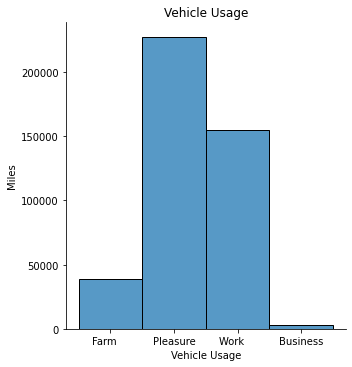

In [16]:
sns.displot(df, x="Vehicle_Usage")
plt.title('Vehicle Usage')
plt.xlabel('Vehicle Usage')
plt.ylabel('Miles')

In [17]:
from plotly.offline  import download_plotlyjs,init_notebook_mode,plot, iplot
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
temp = df.Vehicle_Usage.value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, 1]},
      "hole": .6,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"Vehicle Usage in Miles",
        "annotations": [
            {
                "font": {
                    "size": 17
                },
                "showarrow": False,
                "text": "Vehicle Usage",
                "x": 0.5,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')

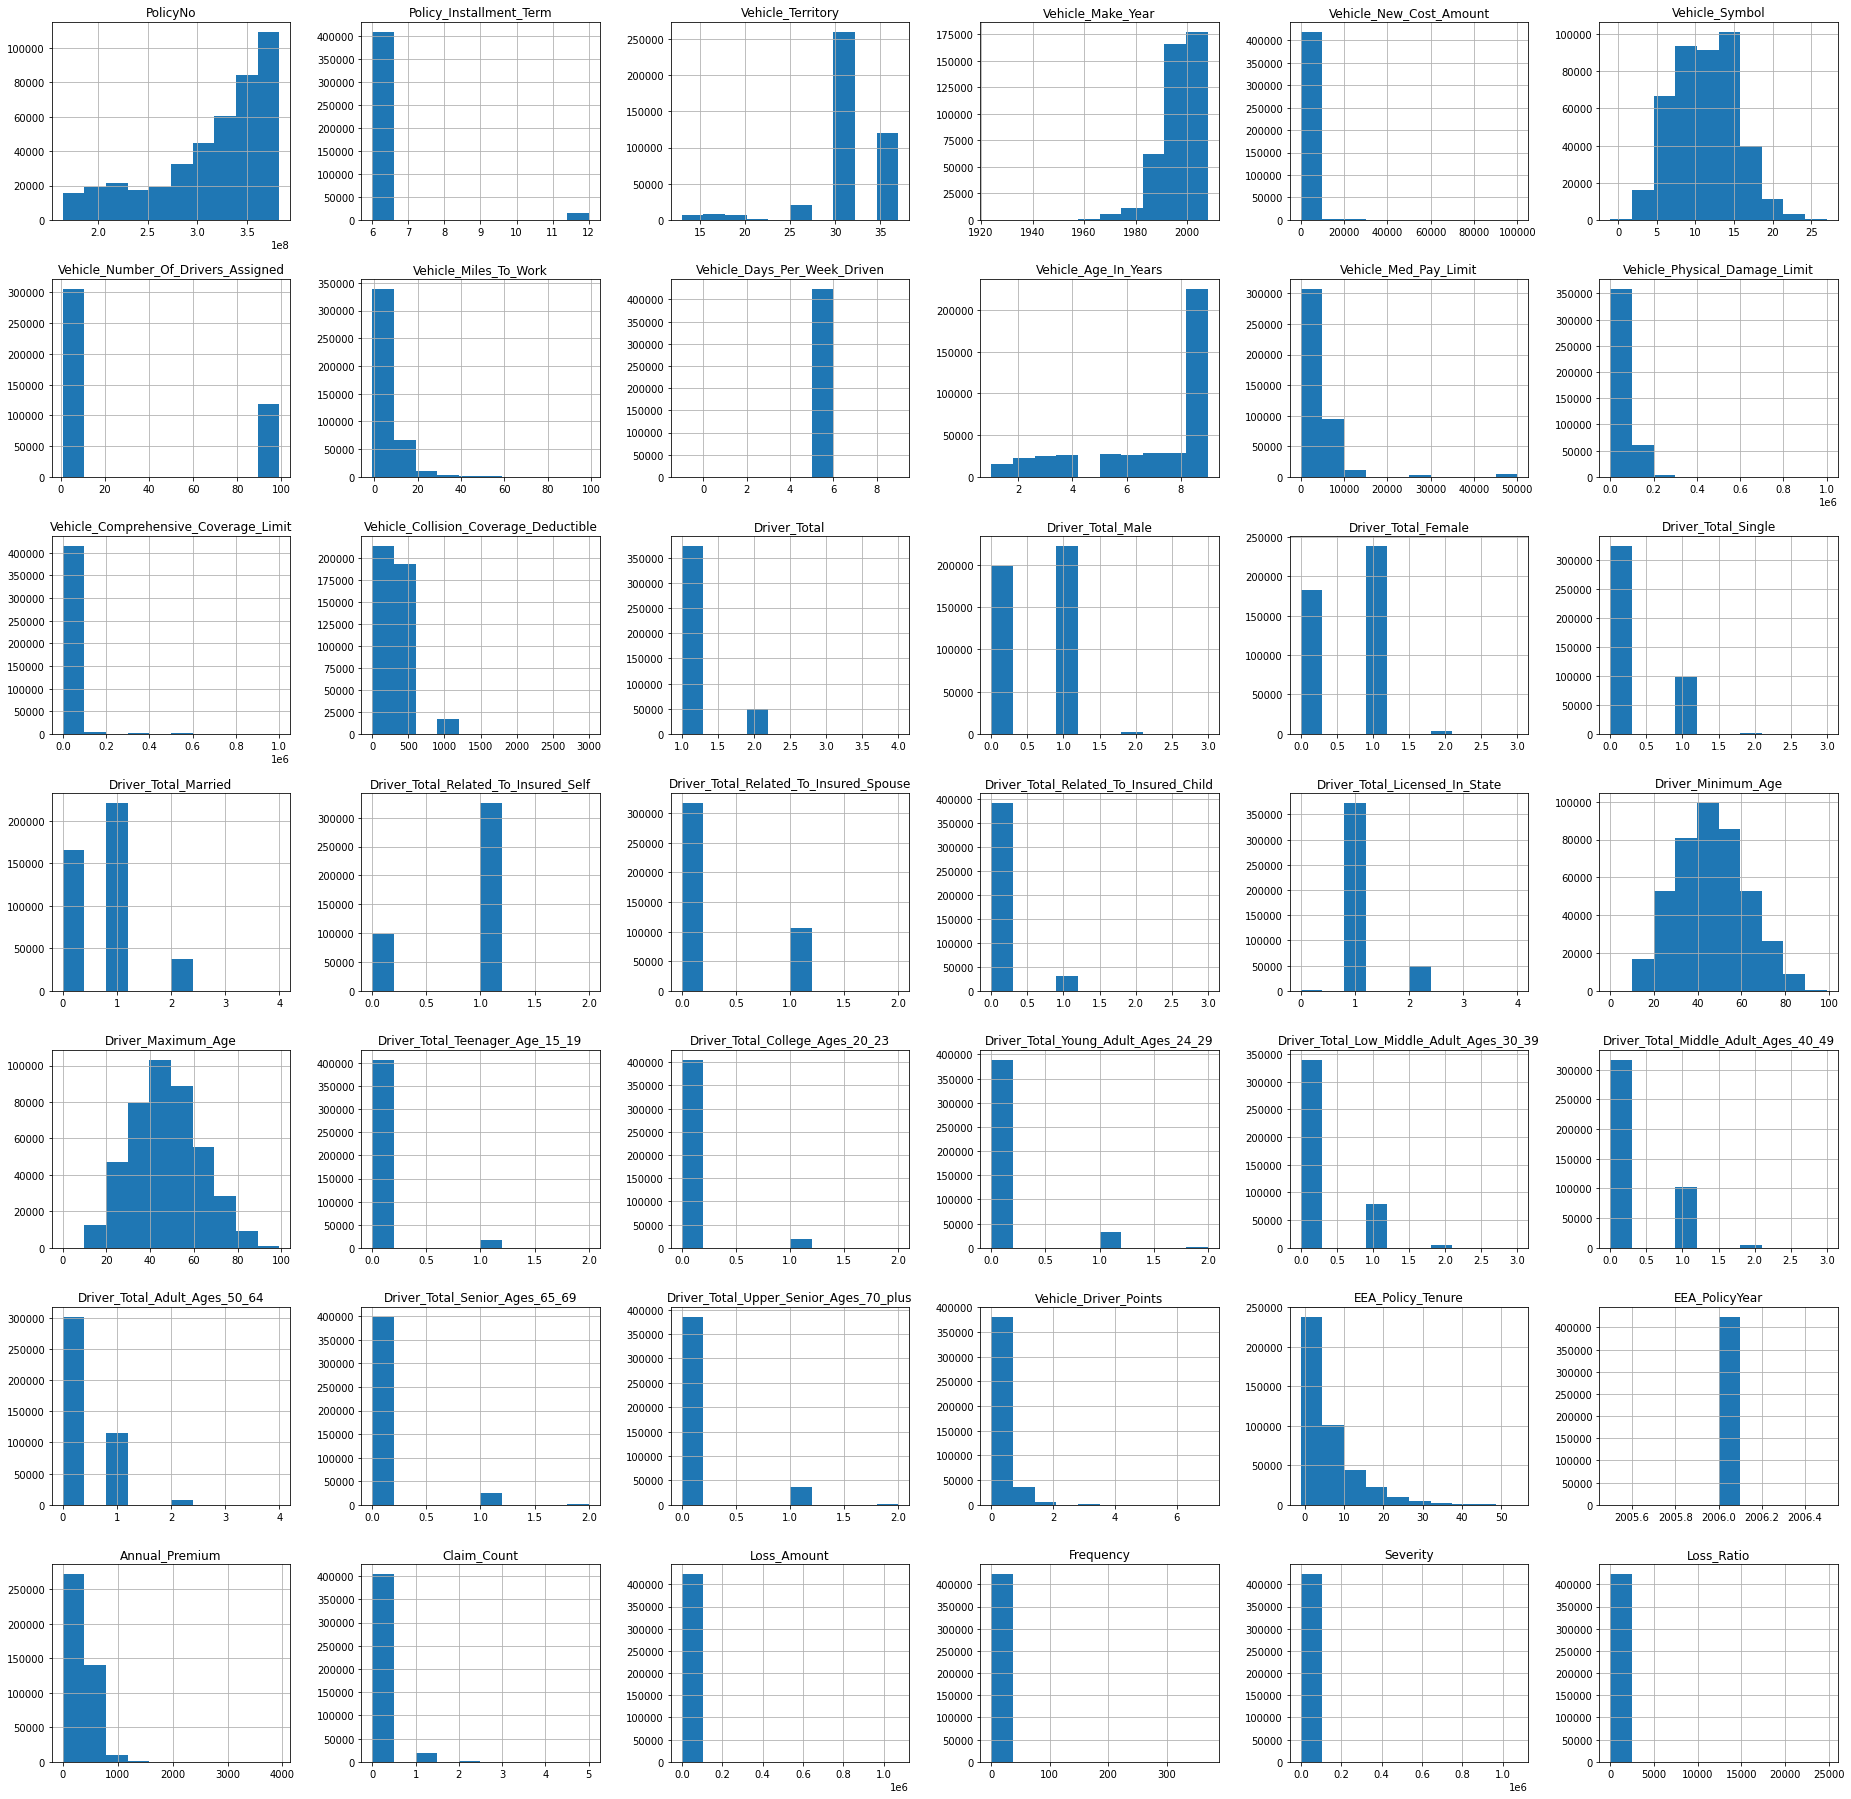

In [18]:
df.hist(figsize=(32,32))
plt.show()